Após gerar o arquivo via Etapa1.cpp, basta colocar o arquivo estatisticas.json junto a pasta desse arquivo .ipynb.

OBS.: É necessário ajustar o nome do arquivo, para `estatistica` concatenado com `_` e em seguida o nome do grafo utilizado, por exemplo: `BHW1`. Ajustar na linha:

`nomeArquivo = 'estatisticas.json'`

para o nome do arquivo gerado na Etapa1.cpp

por exemplo:

`nomeArquivo = 'estatisticas_BHW1.json'`



=== Estatísticas do Grafo ===
nome: BHW1
numVertices: 12
numArestas: 11
numArcos: 22
numVerticesRequeridos: 7
numArestasRequeridas: 11
numArcosRequeridos: 11
densidade: 0.333333
componentes: 1
grauMin: 4
grauMax: 10
caminhoMedio: 16.7121
diametro: 30
intermediacao: [18, 22, 6, 0, 14, 38, 22, 16, 14, 6, 0, 22]


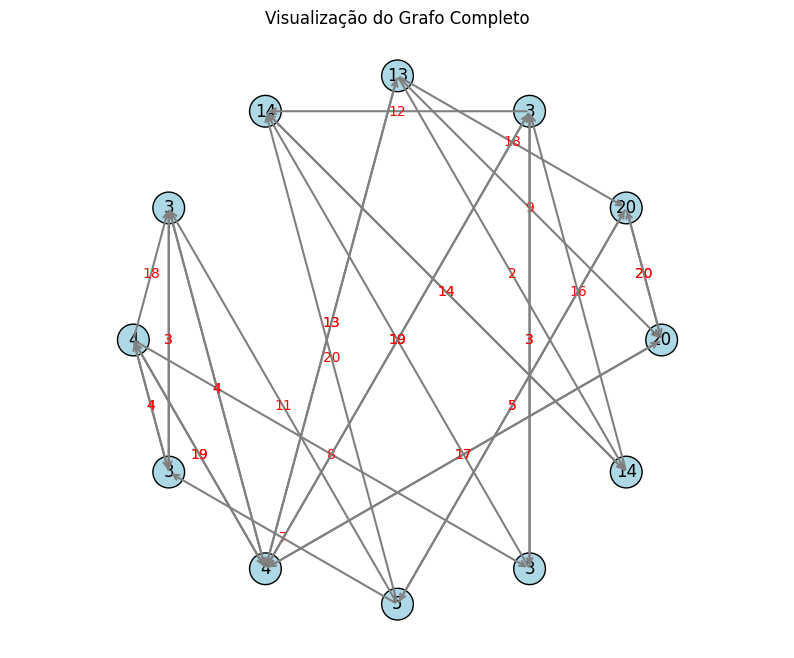

In [10]:
#  * Exemplo de formato de JSON esperado
#  * {
#   "estatisticas": {
#     "numVertices": 2,
#     "numArestas": 1,
#     "numArcos": 0,
#     "numVerticesRequeridos": 1,
#     "numArestasRequeridas": 1,
#     "numArcosRequeridos": 0,
#     "densidade": 1.0,
#     "componentes": 1,
#     "grauMin": 1,
#     "grauMax": 1,
#     "caminhoMedio": 10.0,
#     "diametro": 10,
#     "intermediacao": [0, 0, 0]
#   },
#   "grafo_dot": "digraph G {\\n  1 [label=\"1\"];\\n  2 [label=\"2\"];\\n  1 -> 2 [dir=both, arrowtail=none, arrowhead=none, label=\"10\"];\\n}"
# }

import json
import re
import math
import matplotlib.pyplot as plt

# Nome do arquivo com os dados (JSON)
nome_arquivo = 'estatisticas_BHW1.json'

# Carregando os dados do arquivo JSON
with open(nome_arquivo, 'r') as arquivo:
    dados = json.load(arquivo)

# Exibindo as estatísticas do grafo
print("=== Estatísticas do Grafo ===")
for chave, valor in dados['estatisticas'].items():
    print(f"{chave}: {valor}")

# Recuperando o texto DOT que define o grafo
dot_texto = dados['grafo_dot']

# Extração dos nós usando expressões regulares
# Procura por padrões do tipo: 1 [label="1"];
padrao_nos = re.compile(r'(\S+)\s*\[label="([^"]+)"\]')
nos = {}  # Dicionário para armazenar os nós: chave=id, valor=label
for match in padrao_nos.finditer(dot_texto):
    id_no = match.group(1)
    label_no = match.group(2)
    nos[id_no] = label_no

# Extração das arestas usando expressões regulares
# Procura por padrões do tipo: 1 -> 2 [ ... label="10" ...];
padrao_arestas = re.compile(r'(\S+)\s*->\s*(\S+)\s*\[.*?label="([^"]+)"\]')
arestas = []  # Lista que armazena tuplas (origem, destino, rótulo)
for match in padrao_arestas.finditer(dot_texto):
    origem = match.group(1)
    destino = match.group(2)
    rotulo = match.group(3)
    arestas.append((origem, destino, rotulo))

# Criando um layout circular simples para posicionar os nós
num_nos = len(nos)
raio = 5  # Define o tamanho da circunferência
posicoes = {}  # Dicionário para armazenar as posições (x, y) de cada nó
for i, no in enumerate(nos.keys()):
    angulo = 2 * math.pi * i / num_nos  # Calcula o ângulo para distribuir os nós igualmente
    x = raio * math.cos(angulo)
    y = raio * math.sin(angulo)
    posicoes[no] = (x, y)

# Configuração da figura do matplotlib
plt.figure(figsize=(10, 8))
ax = plt.gca()

# Desenhando os nós: cada nó será um círculo com seu label centralizado
for no, (x, y) in posicoes.items():
    circulo = plt.Circle((x, y), 0.3, color='lightblue', ec='black', zorder=2)
    ax.add_patch(circulo)
    plt.text(x, y, nos[no], fontsize=12, ha='center', va='center', zorder=3)

# Desenhando as arestas: desenha uma seta para cada conexão entre os nós
for origem, destino, rotulo in arestas:
    inicio = posicoes[origem]
    fim = posicoes[destino]
    ax.annotate("",
                xy=fim, xycoords='data',
                xytext=inicio, textcoords='data',
                arrowprops=dict(arrowstyle="->", color="gray", lw=1.5))
    # Posiciona o label da aresta no ponto médio entre os nós
    meio_x = (inicio[0] + fim[0]) / 2
    meio_y = (inicio[1] + fim[1]) / 2
    plt.text(meio_x, meio_y, rotulo, fontsize=10, color='red', ha='center', va='center')

# Finalizando o desenho do grafo
plt.title("Visualização do Grafo Completo")
plt.axis('equal')
plt.axis('off')
plt.show()